In [225]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
#Clusterização
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

- Vicenzo Massao -- RM554833
- Erick Alves -- RM556862
- Luiz Neri -- RM556864


### Fonte dos dados:
https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption

## Descrição das Colunas:

- country (país): O nome do país que está sendo analisado.

- year (ano): O ano da observação ou do dado registrado.

- gdp (PIB em milhões): O Produto Interno Bruto (PIB) do país, representado em milhões de dólares. Reflete o total da produção econômica de um país.

- population (população): A população total do país no ano específico.

- fossil_fuel_consumption (consumo de combustíveis fósseis): A quantidade total de energia consumida proveniente de combustíveis fósseis (como carvão, petróleo e gás), geralmente em TWh (terawatt-horas).

- fossil_share_energy (participação dos combustíveis fósseis na energia): A porcentagem de energia total consumida que provém de combustíveis fósseis.

- fossil_share_elec (participação dos combustíveis fósseis na eletricidade): A porcentagem de eletricidade gerada que provém de combustíveis fósseis.

- biofuel_consumption (consumo de biocombustíveis): A quantidade total de energia consumida proveniente de biocombustíveis, geralmente em TWh.

- biofuel_share_energy (participação dos biocombustíveis na energia): A porcentagem de energia total consumida que provém de biocombustíveis.

- solar_consumption (consumo de energia solar): A quantidade total de energia consumida proveniente de energia solar, geralmente em TWh.

- solar_share_energy (participação da energia solar na energia): A porcentagem de energia total consumida que provém de energia solar.

- wind_consumption (consumo de energia eólica): A quantidade total de energia consumida proveniente de energia eólica, geralmente em TWh.

- wind_share_energy (participação da energia eólica na energia): A porcentagem de energia total consumida que provém de energia eólica.

- hydro_consumption (consumo de energia hidrelétrica): A quantidade total de energia consumida proveniente de energia hidrelétrica, geralmente em TWh.

- hydro_share_energy (participação da energia hidrelétrica na energia): A porcentagem de energia total consumida que provém de energia hidrelétrica.

- nuclear_consumption (consumo de energia nuclear): A quantidade total de energia consumida proveniente de energia nuclear, geralmente em TWh.

- nuclear_share_energy (participação da energia nuclear na energia): A porcentagem de energia total consumida que provém de energia nuclear.

- other_renewable_consumption (consumo de outras fontes renováveis): A quantidade total de energia consumida proveniente de fontes renováveis que não sejam biocombustíveis, solar, eólica ou hidrelétrica (como geotérmica, biomassa, etc.), geralmente em TWh.

- other_renewables_share_energy (participação das outras fontes renováveis na energia): A porcentagem de energia total consumida que provém de outras fontes renováveis.

- greenhouse_gas_emissions (emissões de gases de efeito estufa): A quantidade de gases de efeito estufa emitidos pelo país, geralmente medida em toneladas de CO2 equivalente.

- energy_per_capita (energia per capita): A quantidade total de energia consumida por pessoa no país, geralmente em kWh (quilowatt-horas).

- primary_energy_consumption (consumo de energia primária): A quantidade total de energia consumida em termos de energia primária, que inclui a energia utilizada diretamente e a energia convertida em eletricidade, geralmente em TWh.

- per_capita_electricity (eletricidade per capita): A quantidade de eletricidade consumida por pessoa no país, geralmente em kWh.

- electricity_generation (geração de eletricidade): A quantidade total de eletricidade gerada no país, geralmente em TWh.

- green_energy_consumption (consumo de energia verde): A quantidade total de energia consumida proveniente de fontes renováveis (solar, eólica, hidrelétrica, biomassa, etc.), geralmente em TWh.

- fossil_energy_consumption (consumo de energia fóssil): A quantidade total de energia consumida proveniente de combustíveis fósseis, geralmente em TWh. (Pode ser similar ao valor da coluna "fossil_fuel_consumption", dependendo da definição de "energia" usada.)

- energy_consumption (consumo de energia): A quantidade total de energia consumida tanto de energia limpa (solar, eólica, hidrelétrica, biomassa, etc.) e energia poluente.

- renewable_share_energy (participação das energias renováveis na energia): A porcentagem de energia total consumida que provém de fontes renováveis, COMPARADO COM A ENERGIA PRIMARIA DE UM PAÍS. Isso inclui todas as fontes renováveis, como solar, eólica, hidrelétrica, biomassa, etc.

In [226]:
df = pd.read_csv("WorldEnergyConsumption.csv")
df.drop(df[df['country'] == 'ASEAN (Ember)'].index, inplace=True)
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
24,Afghanistan,1900,AFG,4707744.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Afghanistan,1901,AFG,4751177.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,Afghanistan,1902,AFG,4802500.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Afghanistan,1903,AFG,4861833.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,Afghanistan,1904,AFG,4921891.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [227]:
# Decidindo quais colunas são relevantes e ficarão para serem exploradas.
columns_to_keep = [
    'country', 'year', 'gdp', 'population',
    'fossil_fuel_consumption', 'fossil_share_energy', 'fossil_share_elec',
    'biofuel_consumption', 'biofuel_share_energy',
    'solar_consumption', 'solar_share_energy',
    'wind_consumption', 'wind_share_energy',
    'hydro_consumption', 'hydro_share_energy',
    'nuclear_consumption', 'nuclear_share_energy',
    'other_renewable_consumption', 'other_renewables_share_energy',
    'greenhouse_gas_emissions', 'energy_per_capita', 'primary_energy_consumption',
    'per_capita_electricity', 'electricity_generation'
]

df_filtered = df[columns_to_keep]

# Limpando alguns dados faltantes
df_filtered = df_filtered.fillna(0)

In [228]:
# Filtrando apenas alguns anos com bom espaçamento entre eles, para verificação da evolução do GBP, população, etc...
years_of_interest = [2020, 2014, 2005]
df_filtered = df_filtered[df_filtered['year'].isin(years_of_interest)]

# Criando uma coluna 'green_energy_consumption' para somar todos os consumos "verdes" de um país
df_filtered['green_energy_consumption'] = (
    df_filtered['biofuel_consumption'] + df_filtered['solar_consumption'] +
    df_filtered['wind_consumption'] + df_filtered['hydro_consumption'] +
    df_filtered['other_renewable_consumption']
)

df_filtered['fossil_energy_consumption'] = df_filtered['fossil_fuel_consumption']
df_filtered.drop('fossil_fuel_consumption', axis=1, inplace=True)

In [229]:
# Criando uma coluna energy_consumption para somar o consumo de energia limpas e poluentes de um país
df_filtered['energy_consumption'] = df_filtered['green_energy_consumption'] + df_filtered['fossil_energy_consumption']

In [230]:
# Calculando a porcentagem de energia consumo que é *RENOVÁVEL*
df_filtered['renewable_share_energy'] = df_filtered['green_energy_consumption'] / df_filtered['primary_energy_consumption'] * 100

In [231]:
df_filtered['gdp'] = df_filtered['gdp'] / 1e6  # Convertendo o GDP para milhões, para melhorar visibiilidade
df_filtered = df_filtered.rename(columns={'gdp': 'gdp_millions'})

In [232]:
# Arredondando o gdp para 3 casas decimais, e resetand os indexes
df_filtered['gdp_millions'] = df_filtered['gdp_millions'].round(3)
df_filtered.reset_index(drop=True, inplace=True)
df_filtered.head()

,country,year,gdp_millions,population,fossil_share_energy,fossil_share_elec,biofuel_consumption,biofuel_share_energy,solar_consumption,solar_share_energy,...,other_renewables_share_energy,greenhouse_gas_emissions,energy_per_capita,primary_energy_consumption,per_capita_electricity,electricity_generation,green_energy_consumption,fossil_energy_consumption,energy_consumption,renewable_share_energy
0,Afghanistan,2005,25397.686,2.441120e+07,0.000,28.049,0.000,0.000,0.000,0.000,...,0.000,0.18,252.069,6.153,33.591,0.82,0.000,0.000,0.000,0.000000
1,Afghanistan,2014,64346.108,3.271621e+07,0.000,13.793,0.000,0.000,0.000,0.000,...,0.000,0.15,868.576,28.417,35.456,1.16,0.000,0.000,0.000,0.000000
2,Afghanistan,2020,71417.709,3.897224e+07,0.000,15.000,0.000,0.000,0.000,0.000,...,0.000,0.10,702.888,27.393,20.527,0.80,0.000,0.000,0.000,0.000000
3,Africa,2005,0.000,9.278984e+08,92.152,81.232,0.000,0.000,0.081,0.002,...,0.247,350.56,4079.625,3785.477,604.323,560.75,266.063,3488.385,3754.448,7.028520
4,Africa,2014,0.000,1.170299e+09,91.758,80.308,0.583,0.012,5.030,0.102,...,0.329,459.68,4220.688,4939.468,656.396,768.18,371.233,4532.374,4903.607,7.515647


In [233]:
# Salvand o dataframe processado em um arquivo .csv
df_filtered.to_csv("WorldConsumptionProcessed.csv", index=False)

In [234]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        846 non-null    object 
 1   year                           846 non-null    int64  
 2   gdp_millions                   846 non-null    float64
 3   population                     846 non-null    float64
 4   fossil_share_energy            846 non-null    float64
 5   fossil_share_elec              846 non-null    float64
 6   biofuel_consumption            846 non-null    float64
 7   biofuel_share_energy           846 non-null    float64
 8   solar_consumption              846 non-null    float64
 9   solar_share_energy             846 non-null    float64
 10  wind_consumption               846 non-null    float64
 11  wind_share_energy              846 non-null    float64
 12  hydro_consumption              846 non-null    flo

In [235]:
#Vendo quais são os valores que estão em country para fazer um filtro maior tirando os grupos de paises para analisar apenas paises em si
unique_countries = df_filtered['country'].unique()
unique_countries

array(['Afghanistan', 'Africa', 'Africa (EI)', 'Africa (EIA)',
       'Africa (Ember)', 'Africa (Shift)', 'Albania', 'Algeria',
       'American Samoa', 'Angola', 'Antarctica', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Asia & Oceania (EIA)',
       'Asia (Ember)', 'Asia Pacific (EI)', 'Asia and Oceania (Shift)',
       'Australia', 'Australia and New Zealand (EIA)', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'CIS (EI)', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central & South America (EIA)',
       'Central African Republic', 'Central America (EI)',
       'Central and South America (Shift)', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Islan

In [236]:
groups_to_remove = ['Afghanistan', 'Africa (EI)', 'Africa (EIA)',
       'Africa (Ember)', 'Africa (Shift)', 'Albania', 'Algeria',
       'American Samoa', 'Angola', 'Antarctica', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia & Oceania (EIA)',
       'Asia (Ember)', 'Asia Pacific (EI)', 'Asia and Oceania (Shift)',
       'Australia', 'Australia and New Zealand (EIA)', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'CIS (EI)', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central & South America (EIA)',
       'Central African Republic', 'Central America (EI)',
       'Central and South America (Shift)', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'EU28 (Shift)', 'East Timor',
       'Eastern Africa (EI)', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Eurasia (EIA)', 'Eurasia (Shift)', 'Europe (EI)',
       'Europe (EIA)', 'Europe (Ember)', 'Europe (Shift)',
       'European Union (27)', 'Falkland Islands', 'Faroe Islands', 'Fiji',
       'Finland', 'France', 'French Guiana', 'French Polynesia',
       'G20 (Ember)', 'G7 (Ember)', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada',
       'Guadeloupe', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'High-income countries', 'Honduras',
       'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kiribati', 'Kosovo', 'Kuwait',
       'Kyrgyzstan', 'Laos', 'Latin America and Caribbean (Ember)',
       'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania',
       'Low-income countries', 'Lower-middle-income countries',
       'Luxembourg', 'Macao', 'Madagascar', 'Malawi', 'Malaysia',
       'Maldives', 'Mali', 'Malta', 'Martinique', 'Mauritania',
       'Mauritius', 'Mexico', 'Micronesia (country)',
       'Middle Africa (EI)', 'Middle East (EI)', 'Middle East (EIA)',
       'Middle East (Ember)', 'Middle East (Shift)', 'Moldova',
       'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique',
       'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands',
       'Netherlands Antilles', 'New Caledonia', 'New Zealand',
       'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Non-OECD (EI)',
       'Non-OECD (EIA)', 'Non-OPEC (EI)', 'Non-OPEC (EIA)',
        'North America (EI)', 'North America (Ember)',
       'North America (Shift)', 'North Korea', 'North Macedonia',
       'Northern Mariana Islands', 'Norway', 'OECD (EI)', 'OECD (EIA)',
       'OECD (Ember)', 'OECD (Shift)', 'OPEC (EI)', 'OPEC (EIA)',
       'OPEC (Shift)', 'Oceania (Ember)', 'Oman', 'Pakistan',
       'Palestine', 'Panama', 'Papua New Guinea', 'Paraguay',
       'Persian Gulf (EIA)', 'Persian Gulf (Shift)', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Reunion', 'Romania', 'Russia', 'Rwanda', 'Saint Helena',
       'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines',
       'Samoa', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal',
       'Serbia', 'Serbia and Montenegro', 'Seychelles', 'Sierra Leone',
       'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia',
       'South Africa', 'South Korea', 'South Sudan',
       'South and Central America (EI)', 'Spain', 'Sri Lanka', 'Sudan',
       'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Taiwan',
       'Tajikistan', 'Tanzania', 'Thailand', 'Togo', 'Tonga',
       'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan',
       'Turks and Caicos Islands', 'Tuvalu', 'U.S. Pacific Islands (EIA)',
       'U.S. Territories (EIA)', 'Uganda', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'United States Pacific Islands (Shift)',
       'United States Territories (Shift)',
       'United States Virgin Islands', 'Upper-middle-income countries',
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'Wake Island (EIA)', 'Wake Island (Shift)', 'Western Africa (EI)',
       'Western Sahara', 'World', 'Yemen', 'Zambia', 'Zimbabwe']


df_continents = df_filtered[~df_filtered['country'].isin(groups_to_remove)].copy()

In [237]:
# Lista de grupos para serem excluídos
groups_to_exclude = [
    "Africa", "Asia", "Europe", "North America", "South America", "World", "Oceania",
    "Middle East", "CIS (EI)", "EU28 (Shift)", "European Union (27)", "High-income countries",
    "Low-income countries", "Upper-middle-income countries", "Lower-middle-income countries",
    "OECD (EI)", "OECD (EIA)", "OECD (Ember)", "OECD (Shift)", "Non-OECD (EI)", "Non-OECD (EIA)",
    "Non-OPEC (EI)", "Non-OPEC (EIA)", "G7 (Ember)", "G20 (Ember)", "USSR",
    "Asia", "Africa (EI)", "Africa (Ember)", "Africa (Shift)", "Asia (Ember)", "Asia Pacific (EI)",
    "Asia and Oceania (Shift)", "Australia and New Zealand (EIA)", "Central & South America (EIA)",
    "Central America (EI)", "Central and South America (Shift)", "Eastern Africa (EI)", "Eurasia (EIA)",
    "Eurasia (Shift)", "Europe (EI)", "Europe (Ember)", "Europe (Shift)", "European Union (EIA)",
    "Latin America and Caribbean (Ember)", "Middle Africa (EI)", "Middle East (EI)", "Middle East (EIA)",
    "Middle East (Ember)", "Middle East (Shift)", "Non-OECD (EI)", "Non-OECD (EIA)", "North America (EI)",
    "North America (Ember)", "North America (Shift)", "Oceania (Ember)", "Other Non-OECD - America (EIA)",
    "Other Non-OECD - Asia (EIA)", "Other Non-OECD - Europe and Eurasia (EIA)", "South and Central America (EI)",
    "South Korea and other OECD Asia (EIA)", "South America (EI)", "South Africa (EI)", "South and Central America (EI)",
    "Asia & Oceania (EIA)", "Asia and Oceania (Shift)", "Asia Pacific (EI)", "Asia and Oceania (Ember)"
]



# Criando outro dataset com apenas linha de dados que são de apenas um pais
df_countrys = df_filtered[~df_filtered['country'].isin(groups_to_exclude)].copy()


In [238]:
fig1 = px.line(
    df_countrys,
    x='year',
    y='green_energy_consumption',
    color='country',
    title='Consumo de Energia Renovável por País ao Longo dos Anos',
    labels={'green_energy_consumption': 'Consumo de Energia Renovável (TWh)', 'year': 'Ano'}
)
fig1.show()

C:\ProgramData\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



O gráfico apresentado mostra a evolução do consumo de energia renovável ao longo dos anos. Cada linha no gráfico representa o consumo de energia em um país específico, com o eixo X indicando os anos e o eixo Y mostrando o valor do consumo em TWh.

Esse gráfico mostra que existe alguns páises estagnados quando falamos de consumir energia renovável como Zimbabwe e Romania, enquanto outros possuem um certo crescimento em relação ao consumo de energia limpa ao longo dos anos como China, Estados Unidos, Brasil, Canada e India

In [239]:
fig2 = px.line(
    df_countrys,
    x='year',
    y='energy_consumption',
    color='country',
    title='Evolução do Consumo de Energia ao Longo dos Anos',
    labels={'year': 'Ano', 'energy_consumption': 'Consumo de Energia (TWh)'})
fig2.show()

C:\ProgramData\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



O gráfico apresentado mostra a evolução do consumo de energia em sí ao longo dos anos. Cada linha no gráfico representa o consumo de energia em um país específico, com o eixo X indicando os anos e o eixo Y mostrando o valor do consumo em TWh.

Vale notar que o top 3 países que mais consomem energia são também os 3 que mais consomem energia limpa, mas e quanto a Russia por exemplo que está em 4º lugar dos que mais consomem energia e está em 7º na que mais consome energia limpa ainda é uma boa colocação mas algo importante de se olhar mais atentamente

In [240]:
fig3 = px.scatter(
    df_countrys,
    x='gdp_millions',
    y='energy_consumption',
    color='country',
    title='Comparação de Consumo de Energia e PIB',
    labels={'gdp_millions': 'PIB (US$)', 'energy_consumption': 'Consumo de Energia (TWh)'})
fig3.show()

C:\ProgramData\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



O gráfico apresentado mostra a relação entre o PIB (Produto Interno Bruto) de diferentes países e o consumo de energia. Cada ponto no gráfico representa um país, com o eixo X indicando o PIB em dólares (US$) e o eixo Y mostrando o consumo de energia em terawatts-hora (TWh). As cores dos pontos podem indicar diferentes categorias ou grupos de países, facilitando a análise de padrões e correlações entre o PIB e o consumo de energia.

O gráfico mostra que, de maneira geral, os países com PIB maior tendem a consumir mais energia, mas a relação não é linear. Há um agrupamento de pontos no canto inferior esquerdo, sugerindo que países com PIB baixo consomem pouca energia, mas conforme o PIB cresce, o consumo de energia também aumenta.

Embora haja uma tendência de que países com PIB maior consumam mais energia, o gráfico mostra uma dispersão considerável, sugerindo que outros fatores além do PIB influenciam o consumo de energia, como políticas energéticas, eficiência energética, infraestrutura, etc.

In [241]:
fig4 = px.line(
    df_countrys,
    x='year',
    y='fossil_energy_consumption',
    color='country',
    title='Consumo de Energia Poluente por País ao Longo dos Anos',
    labels={'fossil_energy_consumption': 'Consumo de Energia Poluente (TWh)', 'year': 'Ano'}
)
fig4.show()


C:\ProgramData\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



O gráfico apresentado mostra a evolução do consumo de energia de fonte fossil ao longo dos anos. Cada linha no gráfico representa o consumo de energia em um país específico, com o eixo X indicando os anos e o eixo Y mostrando o valor do consumo em TWh.

Esse gráfico mostra algo muito interessante que os 3 países que mais consomem energia são também os top 3 tanto em consumo de energia limpa e energia fossil, o que significa que eles estão bem equilibrados no quesito consumo o que pode significar algo de certa forma bom mas não significa que não seja ruim


O gráfico apresentado mostra a uma relação entre a população e quantidade de energia ao longo dos anos. Cada linha no gráfico representa o consumo de energia em um país específico, com o eixo X indicando os anos e o eixo Y mostrando o valor do consumo em TWh.

Esse gráfico mostra algo muito interessante que os 3 países que mais consomem energia são também os top 3 tanto em consumo de energia limpa e energia fossil, o que significa que eles estão bem equilibrados no quesito consumo o que pode significar algo de certa forma bom mas não significa que não seja ruim


In [242]:
fig5 = px.pie(
    data_frame=df_continents,
    names='country',  
    values='fossil_energy_consumption', 
    title='Consumo de energia energia Poluente por continente',
    color_discrete_sequence=px.colors.sequential.RdBu
)
fig5.show()

In [243]:
fig6 = px.pie(
    data_frame=df_continents,
    names='country',  
    values='green_energy_consumption', 
    title='Consumo de energia energia limpa por continente',
    color_discrete_sequence=px.colors.sequential.RdBu
)
fig6.show()

Com os Gráfico de Pizza é possivel analisar dentre todos os continentes o que mais consome energia Limpa é o continente Asiatico, porém também é o que mais consome energia poluente entre os continentes algo que não é algo bom até porque continentes como Europa é o terceiro que mais consome energia poluente e quando falamos de energia limpa ele é o segundo colocado algo que é interesante de se estudar

# Clusterização

Primeiro Fazer um modelo de clusterização onde no final ele será exportado como data_filtered_clust.csv

Fazendo um cluster, é importante identificar a quantidade que seria ideal de cluster e para isso usariamos o 

In [244]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        846 non-null    object 
 1   year                           846 non-null    int64  
 2   gdp_millions                   846 non-null    float64
 3   population                     846 non-null    float64
 4   fossil_share_energy            846 non-null    float64
 5   fossil_share_elec              846 non-null    float64
 6   biofuel_consumption            846 non-null    float64
 7   biofuel_share_energy           846 non-null    float64
 8   solar_consumption              846 non-null    float64
 9   solar_share_energy             846 non-null    float64
 10  wind_consumption               846 non-null    float64
 11  wind_share_energy              846 non-null    float64
 12  hydro_consumption              846 non-null    flo

In [245]:
# Tirando as colunas que não são do tipo numerico para filtrar as colunas
columns_to_drop = ['country']

df_filtered_num_reg = df_filtered.drop(columns=['country']).copy()
df_filtered_num_clus = df_filtered.drop(columns=['country']).copy()

In [246]:
# Preenchendo dados faltantes
df_filtered_num_clus['renewable_share_energy'] = df_filtered_num_clus['renewable_share_energy'].fillna(df_filtered_num_clus['renewable_share_energy'].mean())

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_i

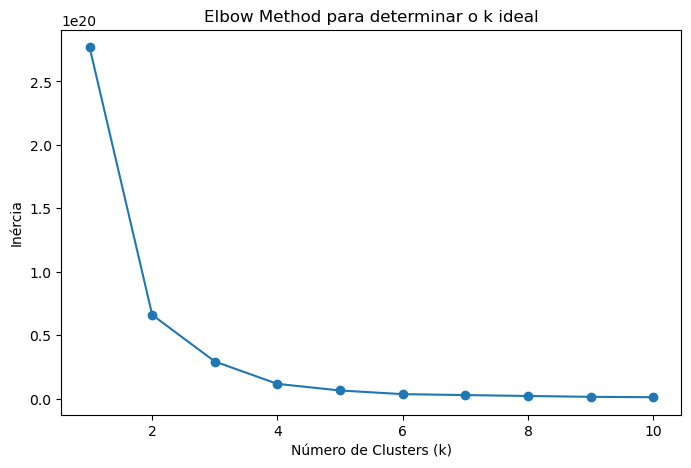

In [247]:
# Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_filtered_num_clus)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Elbow Method para determinar o k ideal')
plt.show()

In [248]:
# Criando cluster com o número ideal
kmeans = KMeans(n_clusters=3, random_state=42)
df_filtered_num_clus['kmeans_cluster'] = kmeans.fit_predict(df_filtered_num_clus)
df_filtered_num_clus['kmeans_cluster'].value_counts()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



kmeans_cluster
0    822
2     18
1      6
Name: count, dtype: int64

In [249]:
# Salvand a clusterização em um .csv
df_filtered_num_clus.to_csv("data_filtered_clust.csv", index=False)

# Modelo de Regressão

Primeiro é necessario criar um conjunto de teste, colocá-lo de lado e nunca checá-lo.

In [250]:
#Separando a base de treino e teste
train_set, test_set = train_test_split(df_filtered_num_reg, test_size=0.2, random_state=42)
df_train = train_set.copy()

#Separando a Label principal
df_treatment_label = df_train[['green_energy_consumption']].copy()

#Remove a Label da base
df_treatment = df_train.drop('green_energy_consumption', axis=1)

#Selecionando as variáveis float64
df_treatment_float64 = df_treatment.select_dtypes(np.float64).copy()

#Adicionando estratégia da mediana no imputer
imputer = SimpleImputer(strategy="median")

#Treina o imputer
imputer.fit(df_treatment_float64)

SimpleImputer(strategy='median')

In [251]:
#Criando uma nova matriz preenchendo os valores nulos com o imputer
float_vars =  imputer.transform(df_treatment_float64)

#Criando novo dataset para apresentar os valores
df_float64 = pd.DataFrame(float_vars, columns=df_treatment_float64.columns,
                          index=df_treatment_float64.index)
df_float64.head()

,gdp_millions,population,fossil_share_energy,fossil_share_elec,biofuel_consumption,biofuel_share_energy,solar_consumption,solar_share_energy,wind_consumption,wind_share_energy,...,other_renewable_consumption,other_renewables_share_energy,greenhouse_gas_emissions,energy_per_capita,primary_energy_consumption,per_capita_electricity,electricity_generation,fossil_energy_consumption,energy_consumption,renewable_share_energy
665,0.000,5930.0,0.000,100.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.03,57585.082,0.341,8431.703,0.05,0.000,0.000,0.000000
633,254196.924,10523314.0,91.920,82.069,0.000,0.000,0.011,0.004,5.077,1.702,...,5.465,1.832,27.39,28343.080,298.263,4372.197,46.01,274.163,298.263,8.080117
570,0.000,69045.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.00,0.000,0.000,0.000,0.00,0.000,0.000,0.000000
788,428931.219,43909664.0,74.134,36.971,0.575,0.063,14.101,1.535,8.573,0.933,...,2.411,0.263,48.09,20916.844,918.452,3365.774,147.79,680.882,726.407,4.956710
539,0.000,1858.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.00,15776.486,0.029,0.000,0.00,0.000,0.000,0.000000


In [252]:
df_treatment_label.info()

<class 'pandas.core.frame.DataFrame'>
Index: 676 entries, 665 to 102
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   green_energy_consumption  676 non-null    float64
dtypes: float64(1)
memory usage: 10.6 KB


In [ ]:
#novo dataset com a seleção das variaveis numéricas categóricas
df_treatment_label = df_treatment_label[['store_id', 'channel_id', 'order_created_day']].copy()